In [1]:
import sklearn
import sklearn.tree
import numpy as np
from io import StringIO
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from matplotlib import pyplot as plt

In [2]:
col_names = "rain,hot temp.,mild temp.,High Humidity,Strong winds,playTennis"
my_tennis_data = np.array([[0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 1, 0],
       [1, 0, 1, 1, 0, 1],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0],
       [0, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 1, 1],
       [1, 0, 1, 1, 1, 0]])
df = pd.DataFrame(data=my_tennis_data, columns=col_names.split(','))
df

,rain,hot temp.,mild temp.,High Humidity,Strong winds,playTennis
0,0,1,0,1,0,0
1,0,1,0,1,1,0
2,1,0,1,1,0,1
3,1,0,0,0,0,1
4,1,0,0,0,1,0
5,0,0,1,1,0,1
6,0,0,0,0,0,1
7,1,0,1,0,0,1
8,0,0,1,0,1,1
9,1,0,1,1,1,0


In [3]:
### select all rows except last column
X_matrix = df.drop("playTennis", axis=1)
### select last column
y = df["playTennis"]

In [4]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(10,4,5), max_iter=2000) # number of hidden layers is passed to the classifier
mlp_clf.fit(X_matrix[:], y[:])

MLPClassifier(hidden_layer_sizes=(10, 4, 5), max_iter=2000)

In [5]:
print("predicted:", mlp_clf.predict(X_matrix.iloc[-2:,:]))
print("truth", y.iloc[-2:].values)

predicted: [1 0]
truth [1 0]


In [6]:
print("Best Loss:", mlp_clf.best_loss_)
print("Number of Layers:", mlp_clf.n_layers_)
print("Output Layer Activation:", mlp_clf.out_activation_)
print("---------------------------------------------------------------------------------------------------------------")
print("Shape of the network weights for each layer:")
print("The first tuple is basically (number of features,size of the first hidden layer), e.g. (5,10)")
print("Second tuple is (size of the first hidden layer, size of the second hidden layer), e.g. (10,4)")
print("Third tuple is (size of the second hidden layer, size of the third hidden layer), e.g. (4,5)")
print("Lastly last layer will output the result, therefore it's size is (size of the third hidden layer, 1), e.g. (5,1)")
print([coef.shape for coef in mlp_clf.coefs_])
print("----------------------------------------------------------------------------------------------------------------")

Best Loss: 0.010315955686739804
Number of Layers: 5
Output Layer Activation: logistic
---------------------------------------------------------------------------------------------------------------
Shape of the network weights for each layer:
The first tuple is basically (number of features,size of the first hidden layer), e.g. (5,10)
Second tuple is (size of the first hidden layer, size of the second hidden layer), e.g. (10,4)
Third tuple is (size of the second hidden layer, size of the third hidden layer), e.g. (4,5)
Lastly last layer will output the result, therefore it's size is (size of the third hidden layer, 1), e.g. (5,1)
[(5, 10), (10, 4), (4, 5), (5, 1)]
----------------------------------------------------------------------------------------------------------------


# A more complex datasets

Next we'll look at the iris dataset once again.  The important thing to note about this dataset is that its values are non-binary and each feature spans different ranges.

In [7]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
pd.DataFrame(X).describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


This can be a problem for neural networks depending on what the activation function looks like.  If you try to give two values that are different x's but the same 'y' value in the activation function the neuron cannot differentiate between the two values.  See below for the two activation functions that we consider in our homework.  What ranges would we want the input data to span for each function?

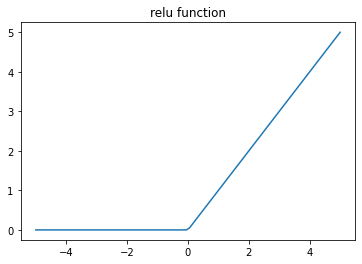

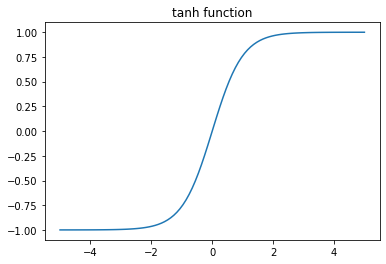

In [8]:
x = np.linspace(-5, 5, 100)
f = plt.figure()
plt.title("relu function")
plt.plot(x, np.maximum(0, x))


f = plt.figure()
plt.title("tanh function")
plt.plot(x, np.tanh(x))

Next we will do the standard KFold evaluation of the model but instead of passing the features directly to the model, we first learn a scaling, apply that scaling then pass it through to the model.  Then on evaluation we apply that scaling to the test set before making our test predictions

In [9]:
kfold = model_selection.KFold(5, shuffle=True, random_state=2)

prec, rec, f1 = [], [], []

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    mlp_clf = mlp_clf(activation='')
    X_scaler = preprocessing.MinMaxScaler()
    
    X_train = X_scaler.fit_transform(X_train)    
    
    mlp_clf.fit(X_train, y_train)
    
    X_test = X_scaler.transform(X_test)
    y_pred = mlp_clf.predict(X_test)
    
    print(y_pred)
    print(y_test)
    
    rec += [metrics.recall_score(y_pred, y_test, average="weighted")]
    prec += [metrics.precision_score(y_pred, y_test, average="weighted")]
    f1 += [metrics.f1_score(y_pred, y_test, average="weighted")]
    
    print()

print("recall    = {:.4f} ±{:.4f}".format(np.mean(rec), np.std(rec)))
print("precision = {:.4f} ±{:.4f}".format(np.mean(prec), np.std(prec)))
print("f1        = {:.4f} ±{:.4f}".format(np.mean(f1), np.std(f1)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2]

[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2]

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2]

[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2]

[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 1 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2]

recall    = 0.9867 ±0.0163
precision = 0.9879 ±0.0148
f1        = 0.9867 ±0.0163
